In [54]:
import pandas as pd

df = pd.read_csv('LIF Ashland Nit 12-13-18.csv')

df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

g = df.groupby('ID')

final=df.merge(g.mean(),on='ID')
final2=final.merge(abs(g.max()-g.min())/g.max(), on='ID')
final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

Results = []

for key, row in final2.iterrows():
    if float(row['Var']) > 0.1:
        Results.append('Error')
    else:
        Results.append(row['Mean'])

final2['Results'] = Results

complete = final2.drop(final2.columns[[1, 2, 3]], axis=1)

final2

,ID,Abs,Mean,Var,Results
0,1_1,0.004,0.004000,0.000000,0.004
1,1_2,0.003,0.003000,0.000000,0.003
2,2_1,0.001,0.001000,0.000000,0.001
3,2_2,0.003,0.003000,0.000000,0.003
4,0,0.006,0.006000,0.000000,0.006
5,0,0.006,0.006000,0.000000,0.006
6,0,0.006,0.006000,0.000000,0.006
7,1500,0.166,0.167667,0.029240,0.167667
8,1500,0.171,0.167667,0.029240,0.167667
9,1500,0.166,0.167667,0.029240,0.167667


y=1.000000x+(0.000000)


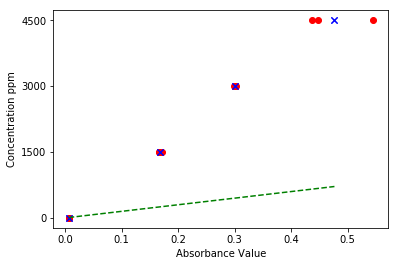

In [117]:
## CREATING A CURVE

import numpy
import matplotlib.pylab as plt
import scipy

# setting ranges in dataframe as variables to plot

c = (final2.iloc[4:16, 1])
a = final2.iloc[4:16, 0]
m = final2.iloc[4:16, 2]

## creating scatterplot with absorbance and concentration values from standards

pylab.plot(c, a, "ro")
pylab.plot(m, a, 'bx')
pylab.ylabel("Concentration ppm")
pylab.xlabel("Absorbance Value")

## fitting curve to points ... work in progress

z = np.polyfit(m, c, 1, rcond=None, full=False, w=None, cov=False)
p = np.poly1d(z)
plt.plot(m,p(m),"g--")
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

alpha = -0.001 M-1.cm-1
k -4.269031448936461
rms residual =  1.5471687371615463


C:\Users\rveenstra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


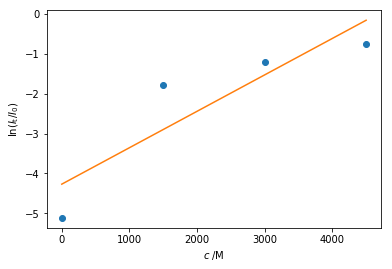

In [28]:
## EXAMPLE FROM ONLINE

import numpy as np
import pylab

# Path length, cm
path = 0.8
# The data: concentrations (M) and It/I0
c = np.array([0, 1500, 3000, 4500])
It_over_I0  = np.array([ 0.006 ,  0.167,  0.300,  0.476])

n = len(c)
A = np.vstack((c, np.ones(n))).T
T = np.log(It_over_I0)

x, resid, _, _ = np.linalg.lstsq(A, T)
m, k = x
alpha = - m / path
print('alpha = {:.3f} M-1.cm-1'.format(alpha))
print('k', k)
print('rms residual = ', np.sqrt(resid[0]))

pylab.plot(c, T, 'o')
pylab.plot(c, m*c + k)
pylab.xlabel('$c\;/\mathrm{M}$')
pylab.ylabel('$\ln(I_\mathrm{t}/I_0)$')
pylab.show()